In [1]:
import matplotlib.pyplot as plt
import numpy as np
from consts import MTU,UNIT_G,BYTE_TO_BIT,UNIT_K,HEADER_SIZE,color_list,min_size_in_bit,avg_size_base_in_bit
BDP_DICT={
    3: 10 * MTU,
    5: 10 * MTU,
    7: 10 * MTU,
}
print(BDP_DICT)

{3: 10000, 5: 10000, 7: 10000}


In [2]:
N_HOSTS=7
BDP = BDP_DICT[N_HOSTS]
BDP_IN_BIT = (BDP + np.ceil(BDP / MTU) * HEADER_SIZE) * BYTE_TO_BIT
SIZE_BUCKET_LIST = np.array(
    [MTU // 2, MTU * 3 // 4, MTU, BDP//5, BDP//2, BDP, 2 * BDP, 3 * BDP, 5 * BDP]
)
bit_to_KB=8000
BDP_IN_KB=BDP_IN_BIT/bit_to_KB
MTU_IN_KB=1
# sigmas=[5000,15000,25000,35000,50000]
sigmas=[5000,25000,50000]
avg_utils = [0.5]
ia_sigmas = [2.0]
seeds = [0]
_fontsize=15
n_flows=10*UNIT_K
lr=10*UNIT_G

size_range (KB):  0.05 9.236
size_range (KB):  0.051 203.025
size_range (KB):  0.052 1264.519


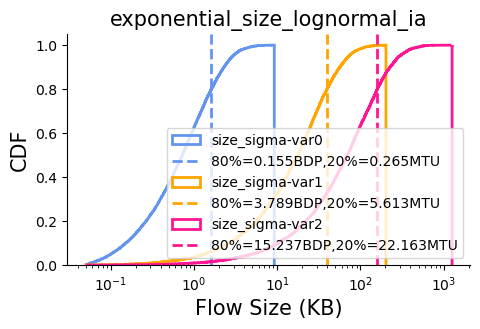

In [9]:
# input_exp_size_lognormal_ia
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
for sigma_idx,size_sigma_ori in enumerate(sigmas):
      mu = avg_size_base_in_bit * (float(size_sigma_ori) / 5000.0)**2- min_size_in_bit
      # mu = avg_size_base_in_bit * sigma / 15000 - min_size_in_bit
      s = (np.random.exponential(scale=mu, size=n_flows))+min_size_in_bit
      s=s/bit_to_KB
      print("size_range (KB): ",
      np.round(np.min(s), 3),
      np.round(np.max(s), 3),)
      
      size_80 = np.percentile(s, 80)
      size_20 = np.percentile(s, 20)
      count, bins, ignored = plt.hist(s, 100000, density=True,cumulative=True,histtype=u'step',linewidth=2,color=color_list[sigma_idx],label=f"size_sigma-var{sigma_idx}")
      plt.axvline(
            size_80,
            color=color_list[sigma_idx],
            linewidth=2,
            linestyle='--',
            label=f"80%={np.round(size_80/BDP_IN_KB,3)}BDP,20%={np.round(size_20/MTU_IN_KB,3)}MTU"
        )
      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Size (KB)", fontsize=_fontsize)
plt.legend()
plt.xscale("log")
plt.title("exponential_size_lognormal_ia",fontsize=_fontsize)
plt.show()

size_range (KB):  0.05 5.225
size_range (KB):  0.089 564.613
size_range (KB):  0.482 5463.959


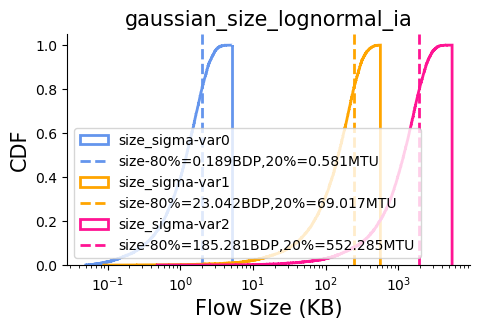

In [11]:
def PosNormal(mean, sigma):
    x = np.random.normal(mean,sigma,1)
    return(x if x>=0 else PosNormal(mean,sigma))

# input_gaussian_size_lognormal_ia
# mu = avg_size_ori_bit - min_size_in_bit
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
for sigma_idx,size_sigma_ori in enumerate(sigmas):
    #   size_sigma = BDP_IN_BIT*float(sigma)/30000.0
    # mu = BDP_IN_BIT*(float(sigma)/30000.0) - min_size_in_bit
    # sigma = BDP_IN_BIT*np.square(float(sigma)/25000.0)
    size_sigma=(float(size_sigma_ori)/5000.0)**3
    mu=avg_size_base_in_bit*size_sigma - min_size_in_bit    
    s=np.array([PosNormal(mu, avg_size_base_in_bit*(size_sigma)) for _ in range(n_flows)])+min_size_in_bit
    # s = abs(np.random.normal(mu, sigma, n_flows))+min_size_in_bit
    
    s=(s/bit_to_KB) # convert to KB
    print("size_range (KB): ",
    np.round(np.min(s), 3),
    np.round(np.max(s), 3),)
    
    size_80 = np.percentile(s, 80)
    size_20 = np.percentile(s, 20)
    count, bins, ignored = plt.hist(s, 10000, density=True,cumulative=True,histtype=u'step',linewidth=2,color=color_list[sigma_idx],label=f"size_sigma-var{sigma_idx}")
    plt.axvline(
        size_80,
        color=color_list[sigma_idx],
        linewidth=2,
        linestyle='--',
        label=f"size-80%={np.round(size_80/BDP_IN_KB,3)}BDP,20%={np.round(size_20/MTU_IN_KB,3)}MTU"
    )
      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Size (KB)", fontsize=_fontsize)
plt.legend()
plt.xscale("log")
plt.title("gaussian_size_lognormal_ia",fontsize=_fontsize)
plt.show()

size_range (KB):  0.05 539.585
size_range (KB):  0.06 31213.632
size_range (KB):  12.15 41460.628


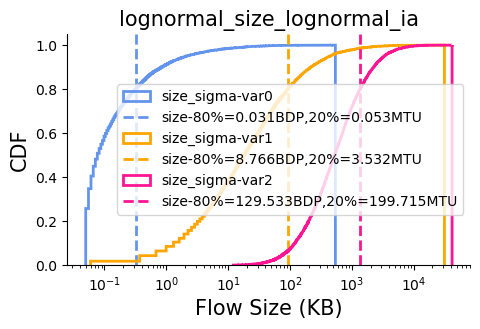

In [7]:
# input_lognormal_size_lognormal_ia
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
for sigma_idx,size_sigma_ori in enumerate(sigmas):
      # mu = np.log(avg_size_ori_bit - min_size_in_bit) - ((sigma / 20000)**2) / 2
      avg_size_in_bit = avg_size_base_in_bit*(float(size_sigma_ori) / 5000.0)**3  # 10KB
      size_sigma=0.8+(60000-size_sigma_ori)/30000     # flow size
      mu = np.log(avg_size_in_bit - min_size_in_bit) - (size_sigma ** 2) / 2
      s = (min_size_in_bit + np.random.lognormal(mean=mu, sigma=size_sigma, size=(n_flows,)))
      
      s=s/bit_to_KB
      print("size_range (KB): ",
      np.round(np.min(s), 3),
      np.round(np.max(s) , 3),)
      
      size_80 = np.percentile(s, 80)
      size_20 = np.percentile(s, 20)
      count, bins, ignored = plt.hist(s, 100000, density=True,cumulative=True,histtype=u'step',linewidth=2,color=color_list[sigma_idx],label=f"size_sigma-var{sigma_idx}")
      plt.axvline(
            size_80,
            color=color_list[sigma_idx],
            linewidth=2,
            linestyle='--',
            label=f"size-80%={np.round(size_80/BDP_IN_KB,3)}BDP,20%={np.round(size_20/MTU_IN_KB,3)}MTU"
        )
      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Size (KB)", fontsize=_fontsize)
plt.legend(loc='right')
plt.xscale('log')
plt.title("lognormal_size_lognormal_ia",fontsize=_fontsize)
plt.show()

sigma:  3200.0
0.4557985059551563
size_range (KB):  0.05 76.025
sigma:  178885.0
0.5113027596779066
size_range (KB):  0.055 18458.852
sigma:  1011928.0
0.5121070665153526
size_range (KB):  0.058 35144.342


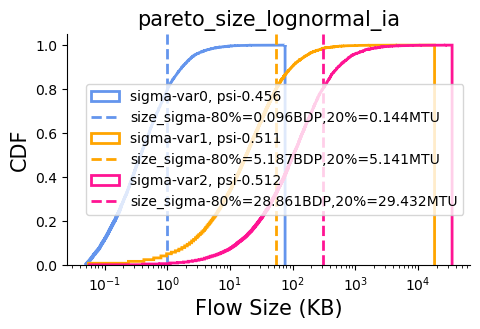

In [3]:
from scipy.stats import genpareto
from scipy.optimize import fsolve

# input_gaussian_size_lognormal_ia
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
for sigma_idx,size_sigma_ori in enumerate(sigmas):
      # sigma=int((sigma_ori-5000)/(50000)*(45000-20000)+20000)
      avg_size_in_bit=avg_size_base_in_bit*(float(size_sigma_ori)/5000.0)**2.5
      size_sigma=avg_size_in_bit//2.5
      print("sigma: ",size_sigma)
      func = lambda x: 5 - np.power(1 + x * (avg_size_in_bit - min_size_in_bit) / size_sigma, 1 / x)
      # func = lambda x: 5 - np.power(1 + x * (avg_size_ori_bit - min_size_in_bit) / sigma, 1 / x)
      psi = fsolve(func, 0.5)[0]
      print(psi)
      assert psi<1.0
      s = min_size_in_bit + size_sigma * genpareto.rvs(c=psi, size=(n_flows,))
      
      s=s/bit_to_KB
      print("size_range (KB): ",
      np.round(np.min(s), 3),
      np.round(np.max(s), 3),)
      
      size_80 = np.percentile(s, 80)
      size_20 = np.percentile(s, 20)
      count, bins, ignored = plt.hist(s, 100000, density=True,cumulative=True,histtype=u'step',linewidth=2,color=color_list[sigma_idx],label=f"sigma-var{sigma_idx}, psi-{np.round(psi,3)}")
      plt.axvline(
            size_80,
            color=color_list[sigma_idx],
            linewidth=2,
            linestyle='--',
            label=f"size_sigma-80%={np.round(size_80/BDP_IN_KB,3)}BDP,20%={np.round(size_20/MTU_IN_KB,3)}MTU"
        )
      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Size (KB)", fontsize=_fontsize)
plt.legend(loc='right')
plt.xscale('log')
plt.title("pareto_size_lognormal_ia",fontsize=_fontsize)
plt.show()

NameError: name 'avg_size_ori_bit' is not defined

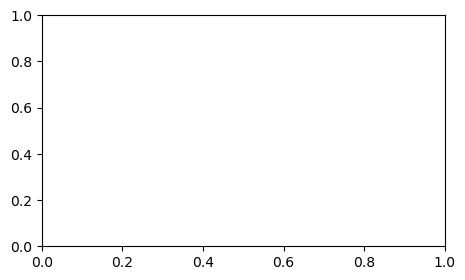

In [23]:
# input_gaussian_size_lognormal_ia
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
arr_sigmas=[1.0,2.0,3.0]
sigma=20000
func = lambda x: 5 - np.power(1 + x * (avg_size_base_in_bit - min_size_in_bit) / sigma, 1 / x)
psi = fsolve(func, 0.5)[0]
s = min_size_in_bit + sigma * genpareto.rvs(c=psi, size=(n_flows,))
f_sizes=(s/BYTE_TO_BIT).astype("int64")
print("size_range (bit): ",
np.round(np.min(s), 3),
np.round(np.max(s), 3),)
avg_size = np.mean(f_sizes * BYTE_TO_BIT)  # convert to bit
avg_inter_time = avg_size / (lr * avg_util)
for arr_sigma_idx,arr_sigma in enumerate(arr_sigmas):
      mu = np.log(avg_inter_time) - (arr_sigma**2) / 2
      f_arr_interval_ns=np.random.lognormal(mean=mu, sigma=arr_sigma, size=(n_flows - 1,))*UNIT_G
      f_arr_ns = np.zeros(shape=(n_flows,))
      f_arr_ns[1:] = (
      np.cumsum(f_arr_interval_ns)
      ).astype("int64")

      sample_list=sorted(np.random.choice(np.arange(len(f_arr_interval_ns)),np.min([len(f_arr_interval_ns),100000]),replace=False))
      plt.plot(np.sort(f_arr_interval_ns)[sample_list], (np.arange(len(f_arr_interval_ns))/len(f_arr_interval_ns))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      # plt.plot(np.sort(f_arr_ns)[sample_list]/ UNIT_G, (np.arange(len(f_arr_ns))/len(f_arr_ns))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      
      utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr_ns[-1] / UNIT_G) / lr
      print("utilization: ", np.round(avg_util, 3), np.round(utilization, 3))
      print("duration (s): ", np.round(f_arr_ns[-1] / UNIT_G, 3))
      print("mean interval (ns): ", np.round(np.mean(f_arr_interval_ns), 3))

      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Arrival Time Interval (ns)", fontsize=_fontsize)
plt.legend()
# plt.yscale('log')
plt.xscale('log')
plt.title("pareto_size_lognormal_ia, \nave_util=0.5, size_sigma=20000",fontsize=_fontsize)
plt.show()

size_range (bit):  400.173 2791892901.728
utilization:  0.5 0.499
duration (s):  4.747
mean interval (ns):  47473.363
utilization:  0.5 0.51
duration (s):  4.638
mean interval (ns):  46382.847
utilization:  0.5 0.534
duration (s):  4.43
mean interval (ns):  44295.889


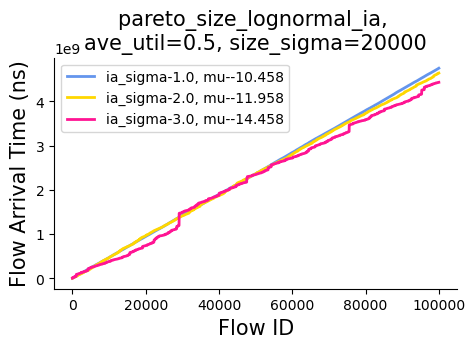

In [51]:
# input_gaussian_size_lognormal_ia_poisson_incast
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
arr_sigmas=[1.0,2.0,3.0]
sigma=20000
func = lambda x: 5 - np.power(1 + x * (avg_size_ori_bit - min_size_in_bit) / sigma, 1 / x)
psi = fsolve(func, 0.5)[0]
s = min_size_in_bit + sigma * genpareto.rvs(c=psi, size=(n_flows,))
f_sizes=(s/BYTE_TO_BIT).astype("int64")
print("size_range (bit): ",
np.round(np.min(s), 3),
np.round(np.max(s), 3),)
avg_size = np.mean(f_sizes * BYTE_TO_BIT)  # convert to bit
avg_inter_time = avg_size / (lr * avg_util)
for arr_sigma_idx,arr_sigma in enumerate(arr_sigmas):
      mu = np.log(avg_inter_time) - (arr_sigma**2) / 2
      
      f_arr_interval_ns=np.random.lognormal(mean=mu, sigma=arr_sigma, size=(n_flows-1,))* UNIT_G

      f_arr = np.zeros(shape=(n_flows,))
      f_arr[1:] = np.cumsum(f_arr_interval_ns).astype("int64")

      # sample_list=sorted(np.random.choice(np.arange(len(f_arr_interval_ns)),np.min([len(f_arr_interval_ns),100000]),replace=False))
      # plt.plot(np.sort(f_arr_interval_ns)[sample_list], (np.arange(len(f_arr_interval_ns))/len(f_arr_interval_ns))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      # sample_list=sorted(np.random.choice(np.arange(len(f_arr_ns)),np.min([len(f_arr_ns),100000]),replace=False))
      plt.plot(f_arr, linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      # plt.plot(np.sort(f_arr_ns)[sample_list], (np.arange(len(f_arr_ns))/len(f_arr_ns))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      
      utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr
      print("utilization: ", np.round(avg_util, 3), np.round(utilization, 3))
      print("duration (s): ", np.round(f_arr[-1] / UNIT_G, 3))
      print("mean interval (ns): ", np.round(np.mean(f_arr_interval_ns), 3))

      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("Flow Arrival Time (ns)", fontsize=_fontsize)
# plt.xlabel("Flow Arrival Time Interval (ns)", fontsize=_fontsize)
plt.xlabel("Flow ID", fontsize=_fontsize)
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.title("pareto_size_lognormal_ia, \nave_util=0.5, size_sigma=20000",fontsize=_fontsize)
plt.show()

size_range (bit):  400.013 2400929623.606
utilization:  0.5 0.5
duration (s):  4.887
mean interval (ns):  5145455.559
utilization:  0.5 0.5
duration (s):  4.887
mean interval (ns):  5096155.937
utilization:  0.5 0.5
duration (s):  4.887
mean interval (ns):  5207628.495


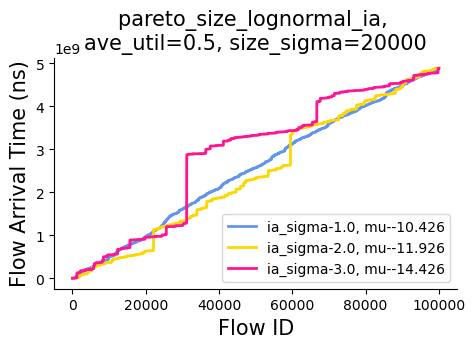

In [52]:
# input_gaussian_size_lognormal_ia_poisson_incast
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
arr_sigmas=[1.0,2.0,3.0]
sigma=20000
func = lambda x: 5 - np.power(1 + x * (avg_size_ori_bit - min_size_in_bit) / sigma, 1 / x)
psi = fsolve(func, 0.5)[0]
s = min_size_in_bit + sigma * genpareto.rvs(c=psi, size=(n_flows,))
f_sizes=(s/BYTE_TO_BIT).astype("int64")
print("size_range (bit): ",
np.round(np.min(s), 3),
np.round(np.max(s), 3),)
avg_size = np.mean(f_sizes * BYTE_TO_BIT)  # convert to bit
avg_inter_time = avg_size / (lr * avg_util)
n_flows_per_group=100
n_group=n_flows//n_flows_per_group
for arr_sigma_idx,arr_sigma in enumerate(arr_sigmas):
      mu = np.log(avg_inter_time) - (arr_sigma**2) / 2
      
      f_arr_interval_ns=np.random.lognormal(mean=mu, sigma=arr_sigma, size=(n_group-1,))* UNIT_G*(n_flows_per_group+5)

      n_flows_per_arr_interval_poisson = np.random.poisson(lam=n_flows_per_group+5, size=n_group)

      f_arr = np.zeros(shape=(n_group,))
      f_arr[1:] = np.cumsum(f_arr_interval_ns).astype("int64")
      f_arr=np.repeat(f_arr,n_flows_per_arr_interval_poisson)[:n_flows]

      # stats
      utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr

      f_arr_interval_ns=f_arr_interval_ns*utilization/avg_util

      f_arr = np.zeros(shape=(n_group,))
      f_arr[1:] = np.cumsum(f_arr_interval_ns).astype("int64")
      f_arr=np.repeat(f_arr,n_flows_per_arr_interval_poisson)[:n_flows]
      
      # sample_list=sorted(np.random.choice(np.arange(len(f_arr_interval_ns)),np.min([len(f_arr_interval_ns),100000]),replace=False))
      # plt.plot(np.sort(f_arr_interval_ns)[sample_list], (np.arange(len(f_arr_interval_ns))/len(f_arr_interval_ns))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      # sample_list=sorted(np.random.choice(np.arange(len(f_arr_ns)),np.min([len(f_arr_ns),100000]),replace=False))
      plt.plot(f_arr, linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      # plt.plot(np.sort(f_arr_ns)[sample_list], (np.arange(len(f_arr_ns))/len(f_arr_ns))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}, mu-{np.round(mu,3)}")
      
      utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr
      print("utilization: ", np.round(avg_util, 3), np.round(utilization, 3))
      print("duration (s): ", np.round(f_arr[-1] / UNIT_G, 3))
      print("mean interval (ns): ", np.round(np.mean(f_arr_interval_ns), 3))

      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("Flow Arrival Time (ns)", fontsize=_fontsize)
# plt.xlabel("Flow Arrival Time Interval (ns)", fontsize=_fontsize)
plt.xlabel("Flow ID", fontsize=_fontsize)
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.title("pareto_size_lognormal_ia, \nave_util=0.5, size_sigma=20000",fontsize=_fontsize)
plt.show()

load ./GoogleRPC2008.txt
size_range (bit):  400 55081336
load ./FbHdp_distribution.txt
size_range (bit):  408 78742688
load ./WebSearch_distribution.txt
size_range (bit):  456 239712376


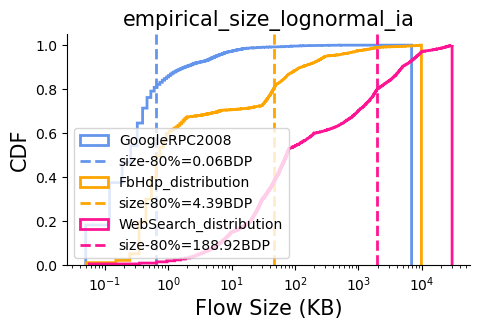

In [60]:
# input_empirical_size_lognormal_ia
from custom_rand import CustomRand

fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)

# cdf_file_list=["GoogleRPC2008.txt","AliStorage2019.txt","FbHdp_distribution.txt","WebSearch_distribution.txt"]
cdf_file_list=["GoogleRPC2008.txt","FbHdp_distribution.txt","WebSearch_distribution.txt"]

for cdf_file_idx,cdf_file in enumerate(cdf_file_list):
      fileName = f"./{cdf_file}"
      print(f"load {fileName}")
      file = open(fileName, "r")
      lines = file.readlines()
      # read the cdf, save in cdf as [[x_i, cdf_i] ...]
      cdf = []
      for line in lines:
            x, y = map(float, line.strip().split(" "))
            cdf.append([x, y])
      customRand = CustomRand()
      if not customRand.setCdf(cdf):
            print("Error: Not valid cdf")
            exit()
      avg_size_ori_bit = customRand.getAvg() * BYTE_TO_BIT + min_size_in_bit
      f_sizes = np.array(
      ([customRand.rand() + min_size_in_bit // BYTE_TO_BIT for _ in range(n_flows)])
      ).astype(
      "int64"
      )  # Byte
      s=f_sizes*BYTE_TO_BIT
      print("size_range (bit): ",
      np.round(np.min(s), 3),
      np.round(np.max(s) , 3),)
      s=s/bit_to_KB
      size_80 = np.percentile(s, 80)
      count, bins, ignored = plt.hist(s, 100000, density=True,cumulative=True,histtype=u'step',linewidth=2,color=color_list[cdf_file_idx],label=f"{cdf_file[:-4]}")
      plt.axvline(
            size_80,
            color=color_list[cdf_file_idx],
            linewidth=2,
            linestyle='--',
            label=f"size-80%={np.round(size_80/BDP_IN_KB,2)}BDP"
        )
      # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
      #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
      #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Size (KB)", fontsize=_fontsize)
plt.legend()
plt.xscale('log')
plt.title("empirical_size_lognormal_ia",fontsize=_fontsize)
plt.show()

size_range (bit):  400.252 22421575.219
utilization:  0.5 0.5
duration (s):  1.393
mean interval (ns):  13932.777
utilization:  0.5 0.5
duration (s):  1.393
mean interval (ns):  13932.777
utilization:  0.5 0.5
duration (s):  1.393
mean interval (ns):  13932.777
utilization:  0.5 0.5
duration (s):  1.393
mean interval (ns):  13932.777
utilization:  0.5 0.5
duration (s):  1.393
mean interval (ns):  13932.777
utilization:  0.5 0.5
duration (s):  1.393
mean interval (ns):  13932.777


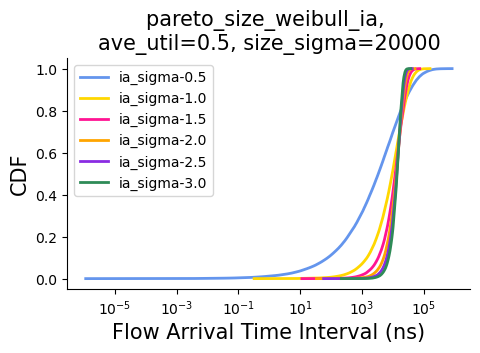

In [27]:
from scipy.stats import genpareto
from scipy.optimize import fsolve
# input_pareto_size_weibull_ia
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
arr_sigmas=[0.5,1.0,1.5,2.0,2.5,3.0]
sigma=30000
func = lambda x: 5 - np.power(1 + x * (avg_size_ori_bit - min_size_in_bit) / sigma, 1 / x)
psi = fsolve(func, 0.5)[0]
s = min_size_in_bit + sigma * genpareto.rvs(c=psi, size=(n_flows,))
f_sizes=(s/BYTE_TO_BIT).astype("int64")
print("size_range (bit): ",
np.round(np.min(s), 3),
np.round(np.max(s), 3),)
avg_size = np.mean(f_sizes * BYTE_TO_BIT)  # convert to bit
avg_inter_time = avg_size / (lr * avg_util)
for arr_sigma_idx,arr_sigma in enumerate(arr_sigmas):
    f_arr_inter=np.random.weibull(a=arr_sigma, size=(n_flows - 1,))*UNIT_G
    f_arr = np.zeros(shape=(n_flows,))
    f_arr[1:] = (
    np.cumsum(f_arr_inter)
    ).astype("int64")
    utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr
    f_arr_inter=f_arr_inter*utilization/avg_util

    f_arr = np.zeros(shape=(n_flows,))
    f_arr[1:] = (
        np.cumsum(f_arr_inter)
    ).astype("int64")
    
    sample_list=sorted(np.random.choice(np.arange(len(f_arr_inter)),np.min([len(f_arr_inter),100000]),replace=False))
    plt.plot(np.sort(f_arr_inter)[sample_list], (np.arange(len(f_arr_inter))/len(f_arr_inter))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}")
    # plt.plot(np.sort(f_arr)[sample_list]/ UNIT_G, (np.arange(len(f_arr))/len(f_arr))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}")
    # plt.plot(f_arr, linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}")
    
    utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr
    print("utilization: ", np.round(avg_util, 3), np.round(utilization, 3))
    print("duration (s): ", np.round(f_arr[-1] / UNIT_G, 3))
    print("mean interval (ns): ", np.round(np.mean(f_arr_inter), 3))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Arrival Time Interval (ns)", fontsize=_fontsize)
plt.legend()
# plt.yscale('log')
plt.xscale('log')
plt.title("pareto_size_weibull_ia, \nave_util=0.5, size_sigma=20000",fontsize=_fontsize)
plt.show()

size_range (bit):  400.08 53401007.995
utilization:  0.5 0.5
duration (s):  1.409
mean interval (ns):  14089.643
utilization:  0.5 0.5
duration (s):  1.409
mean interval (ns):  14089.643
utilization:  0.5 0.5
duration (s):  1.409
mean interval (ns):  14089.643
utilization:  0.5 0.5
duration (s):  1.409
mean interval (ns):  14089.643
utilization:  0.5 0.5
duration (s):  1.409
mean interval (ns):  14089.643
utilization:  0.5 0.5
duration (s):  1.409
mean interval (ns):  14089.643


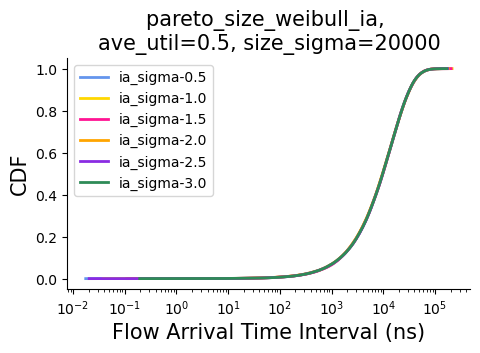

In [28]:
from scipy.stats import genpareto
from scipy.optimize import fsolve
# input_pareto_size_weibull_ia
fig = plt.figure(figsize=(5.2, 3))  # 2.5 inch for 1/3 double column width
ax = fig.add_subplot(111)
arr_sigmas=[0.5,1.0,1.5,2.0,2.5,3.0]
sigma=30000
func = lambda x: 5 - np.power(1 + x * (avg_size_ori_bit - min_size_in_bit) / sigma, 1 / x)
psi = fsolve(func, 0.5)[0]
s = min_size_in_bit + sigma * genpareto.rvs(c=psi, size=(n_flows,))
f_sizes=(s/BYTE_TO_BIT).astype("int64")
print("size_range (bit): ",
np.round(np.min(s), 3),
np.round(np.max(s), 3),)
avg_size = np.mean(f_sizes * BYTE_TO_BIT)  # convert to bit
avg_inter_time = avg_size / (lr * avg_util)
for arr_sigma_idx,arr_sigma in enumerate(arr_sigmas):
    f_arr_inter=np.random.exponential(scale=arr_sigma, size=(n_flows - 1,))*UNIT_G
    f_arr = np.zeros(shape=(n_flows,))
    f_arr[1:] = (
    np.cumsum(f_arr_inter)
    ).astype("int64")
    utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr
    f_arr_inter=f_arr_inter*utilization/avg_util

    f_arr = np.zeros(shape=(n_flows,))
    f_arr[1:] = (
        np.cumsum(f_arr_inter)
    ).astype("int64")
    
    sample_list=sorted(np.random.choice(np.arange(len(f_arr_inter)),np.min([len(f_arr_inter),100000]),replace=False))
    plt.plot(np.sort(f_arr_inter)[sample_list], (np.arange(len(f_arr_inter))/len(f_arr_inter))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}")
    # plt.plot(np.sort(f_arr)[sample_list]/ UNIT_G, (np.arange(len(f_arr))/len(f_arr))[sample_list], linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}")
    # plt.plot(f_arr, linewidth=2,color=color_list[arr_sigma_idx],label=f"ia_sigma-{arr_sigma}")
    
    utilization = np.sum(f_sizes * BYTE_TO_BIT) / (f_arr[-1] / UNIT_G) / lr
    print("utilization: ", np.round(avg_util, 3), np.round(utilization, 3))
    print("duration (s): ", np.round(f_arr[-1] / UNIT_G, 3))
    print("mean interval (ns): ", np.round(np.mean(f_arr_inter), 3))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    #          linewidth=2, color='r')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("CDF", fontsize=_fontsize)
plt.xlabel("Flow Arrival Time Interval (ns)", fontsize=_fontsize)
plt.legend()
# plt.yscale('log')
plt.xscale('log')
plt.title("pareto_size_weibull_ia, \nave_util=0.5, size_sigma=20000",fontsize=_fontsize)
plt.show()